In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patterns import data2patterns, msd2pattern, print_frequent_patterns, msd2decision
from patterns import scaled_al_heatmap, unscaled_al_ggh_heatmap, scaled_al_ggh_heatmap

In [2]:
# input parameters 
lang='finnish'
exp_dir='experiments'
bpe_n=1000
beam_size=1

# bpe files
bpe_file_dev='{}/{}/bpe{}/dev_segm'.format(exp_dir,lang,bpe_n)
bpe_file_train='{}/{}/bpe{}/train_high_segm'.format(exp_dir,lang,bpe_n)
bpe_file_test='{}/{}/bpe{}/test_segm'.format(exp_dir,lang,bpe_n)
bpe_files = [bpe_file_dev, bpe_file_train, bpe_file_test]

# attention files for chED+subwSELF-ATT model
attn_file_dev='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-dev.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)
attn_file_train='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-train-high.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)
attn_file_test='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-test.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)
attn_files = [attn_file_dev, attn_file_train, attn_file_test]

# gold files
gold_file_dev='{}/{}/{}-dev'.format(exp_dir,lang,lang)
gold_file_train='{}/{}/{}-train-high'.format(exp_dir,lang,lang)
gold_file_test='{}/{}/{}-test'.format(exp_dir,lang,lang)
gold_files = [gold_file_dev, gold_file_train, gold_file_test]

### Pattern extraction

####  Transformation Patterns

In [3]:
attn_data = []
for f in attn_files:
    attn_data.extend(torch.load(f))

phen_msd = 'V;ACT;PRS;POS;IMP;3;PL'   
    
pattern_list = data2patterns(attn_data, allow_double_al=False)
phen_dict_regr, phen_dict_regr_freq, phen_dict_regr_acc = msd2pattern(phen_msd,
                                                                      attn_data,pattern_list,gold_files)

print_frequent_patterns(phen_msd, phen_dict_regr, 
                            phen_dict_regr_freq, phen_dict_regr_acc, n=15)

MSD V;ACT;PRS;POS;IMP;3;PL, frequency: 46, accuracy: 0.978261

frequency: 23, coverage: 0.5, accuracy: 1.0
unmasekd_pattern:  c1 a --> c1 k oo t
frequency by pattern:  {'c1 a --> c1 f5_0 f4_0 f6_0': 23}
alignments and masks for the most frequent masked pattern:

___mask2src_after_unmasking: c1: average length of 7.1

___trg2mask_after_unmasking (support 1): k:f5_0, oo:f4_0, t:f6_0

___mask2trg_after_unmasking: c1: average length of 7.1

IDs: 680 : karsastaa : karsastakoot, 1142 : kuorettua : kuorettukoot, 1233 : purjehtia : purjehtikoot, 3280 : ylikorostaa : ylikorostakoot, 3943 : hahmottaa : hahmottakoot, 4501 : harsia : harsikoot, 4738 : aktuaalistaa : aktuaalistakoot, 5259 : tehostaa : tehostakoot, 5547 : jokeltaa : jokeltakoot, 5757 : vaahdottaa : vaahdottakoot, 5869 : kehua : kehukoot, 6349 : parantua : parantukoot, 6656 : herua : herukoot, 7024 : murtaa : murtakoot, 8123 : kuristua : kuristukoot, 8395 : uhkua : uhkukoot, 8734 : noutaa : noutakoot, 9397 : legaalistaa : legaalistak

#### Lemma Patterns 

In [4]:
attn_data = []
for f in attn_files:
    attn_data.extend(torch.load(f))

print('Form ends with -kott')
partial_trg = 'koot'
partial_msd = 'V;ACT;PRS;POS;IMP;3;PL'

phen_dict = msd2decision(partial_msd,partial_trg,attn_data,
                         gold_files,bpe_files,pattern='end',
                         n_global_heads=1,pull_max=False,ave_threshold=False)
for k,v in phen_dict.items():
    if k=='phen':
        print('class:{}, acc: {}, freq: {}'.format(k,
                                               v['acc']/v['freq'], v['freq']))
        str_out=''
        for p,f in sorted(v['pat'].items(), key=lambda x:x[1]['freq'], reverse=True):
            if f['freq']>=1:
                print('{}:{}/{}'.format(p,f['freq'],f['acc']/f['freq']))
                print('({})'.format(', '.join(f['ex'][:10])))
                str_out+='{}:{}/{} ({}), '.format(p,f['freq'],f['acc']/f['freq'],f['ex'][0])

print(str_out)

print()
print()
print('Form ends with -kööt')
partial_trg = 'kööt'
partial_msd = 'V;ACT;PRS;POS;IMP;3;PL'

phen_dict = msd2decision(partial_msd,partial_trg,attn_data,
                         gold_files,bpe_files,pattern='end',
                         n_global_heads=1,pull_max=False,ave_threshold=False)
for k,v in phen_dict.items():
    if k=='phen':
        print('class:{}, acc: {}, freq: {}'.format(k,
                                               v['acc']/v['freq'], v['freq']))
        str_out=''
        for p,f in sorted(v['pat'].items(), key=lambda x:x[1]['freq'], reverse=True):
            if f['freq']>=1:
                print('{}:{}/{}'.format(p,f['freq'],f['acc']/f['freq']))
                print('({})'.format(', '.join(f['ex'][:10])))
                str_out+='{}:{}/{} ({}), '.format(p,f['freq'],f['acc']/f['freq'],f['ex'][0])

print(str_out)

Form ends with -kott
class:phen, acc: 0.972972972972973, freq: 37
*aa:8/1.0
(680:kar|sa|st|aa, 3280:yli|ko|ro|st|aa, 4738:ak|tu|aal|ist|aa, 5259:teho|st|aa, 5757:va|a|hd|ott|aa, 9397:le|ga|al|ist|aa, 10989:ha|j|ust|aa, 11798:kol|is|utt|aa)
*ua:5/1.0
(1142:ku|or|ett|ua, 5869:keh|ua, 6656:her|ua, 8123:ku|rist|ua, 10007:ri|eh|ua)
*id*:5/1.0
(3448:pro|mo|vo|id|a, 3784:pa|ten|to|id|a, 6110:ha|k|ker|o|id|a, 7605:van|d|al|iso|id|a, 9114:pr|es|iso|id|a)
*a:4/1.0
(1233:pu|r|je|hti|a, 6349:par|an|tu|a, 8395:uh|ku|a, 10651:n|uh|ra|utu|a)
*ta:4/1.0
(2104:sk|r|uud|a|ta, 4670:pa|ks|u|ta, 5084:pa|ala|ta, 6371:m|al|la|ta)
*taa:4/1.0
(5547:jo|kel|taa, 7024:mu|r|taa, 8734:nou|taa, 11768:huo|j|en|taa)
*illa:2/1.0
(413:aal|to|illa, 6946:ki|e|kko|illa)
*ella:2/0.5
(6017:n|ar|a|hd|ella, 7126:ko|ha|u|t|ella)
*ttaa:1/1.0
(3943:ha|h|mo|ttaa)
*sia:1/1.0
(4501:har|sia)
*ista:1/1.0
(4815:li|i|pa|ista)
*aa:8/1.0 (680:kar|sa|st|aa), *ua:5/1.0 (1142:ku|or|ett|ua), *id*:5/1.0 (3448:pro|mo|vo|id|a), *a:4/1.0 (1233:pu|

### Attention visualization examples

#### chED model

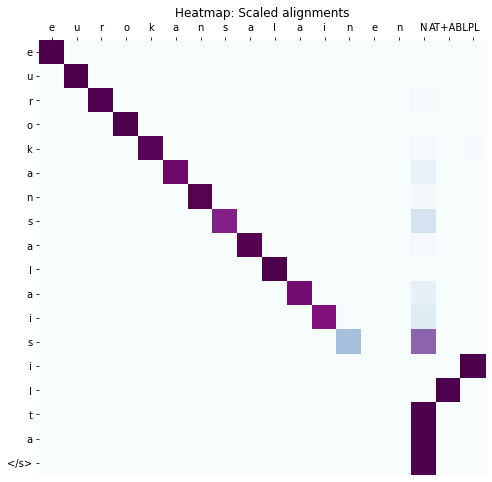

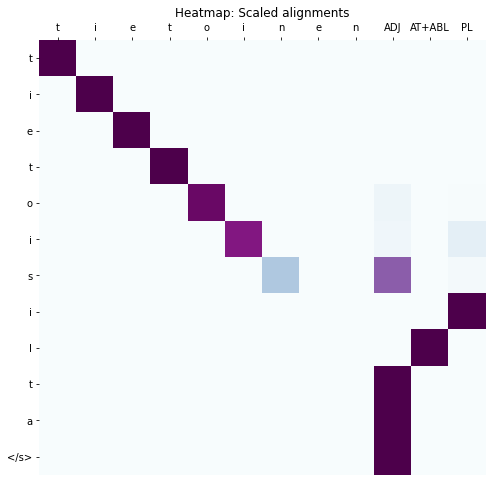

In [5]:
attn_file='{}/{}/ch/gate-sparse-models/predict/{}-dev.pred.{}.attn'.format(exp_dir,lang,lang,beam_size)

attn_data=torch.load(attn_file)

scaled_al_heatmap(attn_data,84)

scaled_al_heatmap(attn_data,15)

#### chED+chSELF-ATT

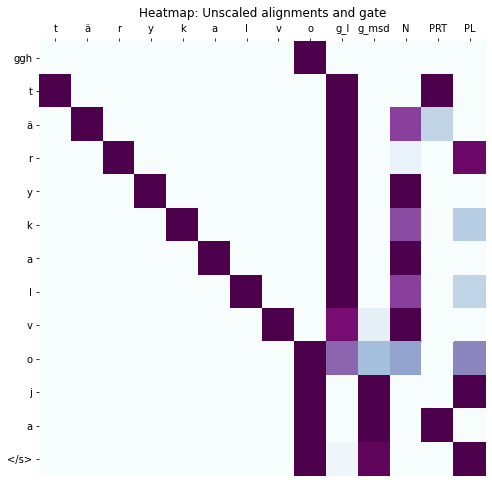

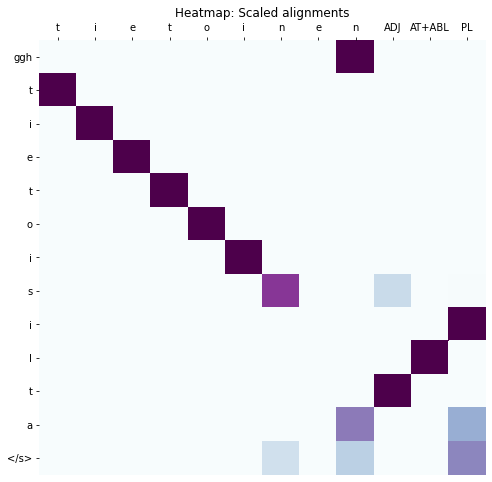

In [6]:
attn_file='{}/{}/ch/gate-sparse-enc-static-head-models/predict/{}-dev.pred.{}.attn'.format(
    exp_dir,lang,lang,beam_size)

attn_ggh_data=torch.load(attn_file)
unscaled_al_ggh_heatmap(attn_ggh_data,3,n_global_heads=1)
scaled_al_ggh_heatmap(attn_ggh_data,15,n_global_heads=1)

#### chED+subwSELF-ATT

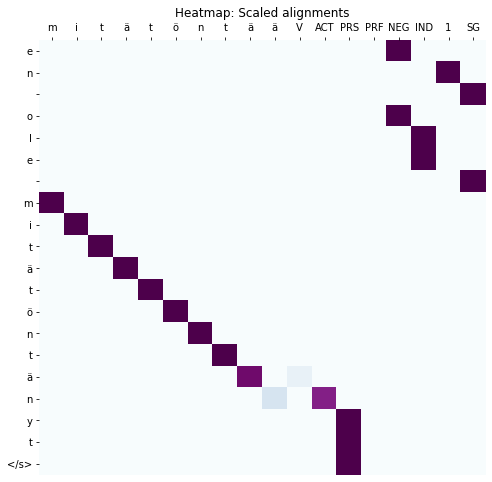

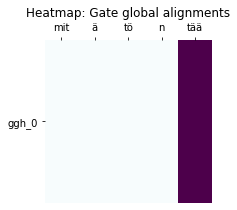

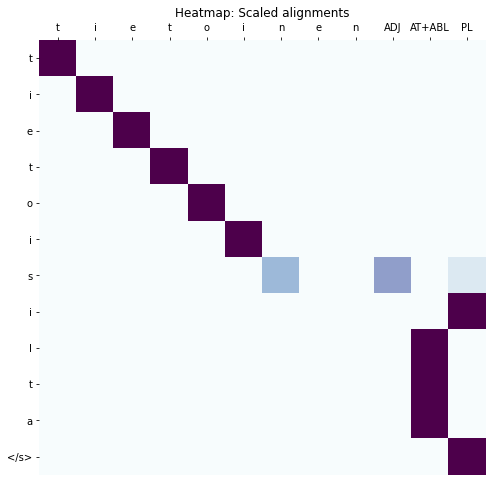

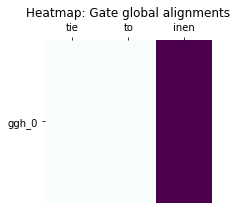

In [7]:
attn_file='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-dev.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)

attn_ggh_bpe_data_comb=torch.load(attn_file)
scaled_al_ggh_heatmap(attn_ggh_bpe_data_comb,68, bpe=True, bpe_data=bpe_file_dev, n_global_heads=1)
scaled_al_ggh_heatmap(attn_ggh_bpe_data_comb,15, bpe=True, bpe_data=bpe_file_dev, n_global_heads=1)
